In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [78]:
data = pd.read_csv('data/main-df.csv')
data

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,...,87.02,3.38,16941,177,274,1.044803,1.617378,5.6,12.2,16687
3136,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,...,89.16,3.42,9172,50,78,0.545137,0.850414,3.6,8.5,7873
3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,...,87.02,3.38,7401,75,116,1.013377,1.567356,5.8,14.2,7557
3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,...,86.12,3.26,3141,17,27,0.541229,0.859599,7.9,14.2,3461


In [40]:
data.iloc[:, 14]

0       103.0
1       282.0
2        97.0
3        37.0
4        46.0
        ...  
3135     31.0
3136     10.0
3137      0.0
3138      0.0
3139      0.0
Name: PLHIV, Length: 3140, dtype: float64

In [27]:
def univariate_plots(x, y, title, rows, cols, y_title):
    fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (30, 20))
    axs = axs.ravel()
    columns = x.transpose()
    for i in range(len(columns)):
        axs[i].scatter(columns[i], y)
        axs[i].set_title(title[i] + " vs." + y_title)
    plt.show()
    fig.savefig('eda.png')

In [9]:
data.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [10]:
y_0 = data['HIVdiagnoses']
y_1 = data['HIVincidence']
y_2 = data['HIVprevalence']

In [17]:
x = data.iloc[:, 8:].to_numpy()
len(x.T)

30

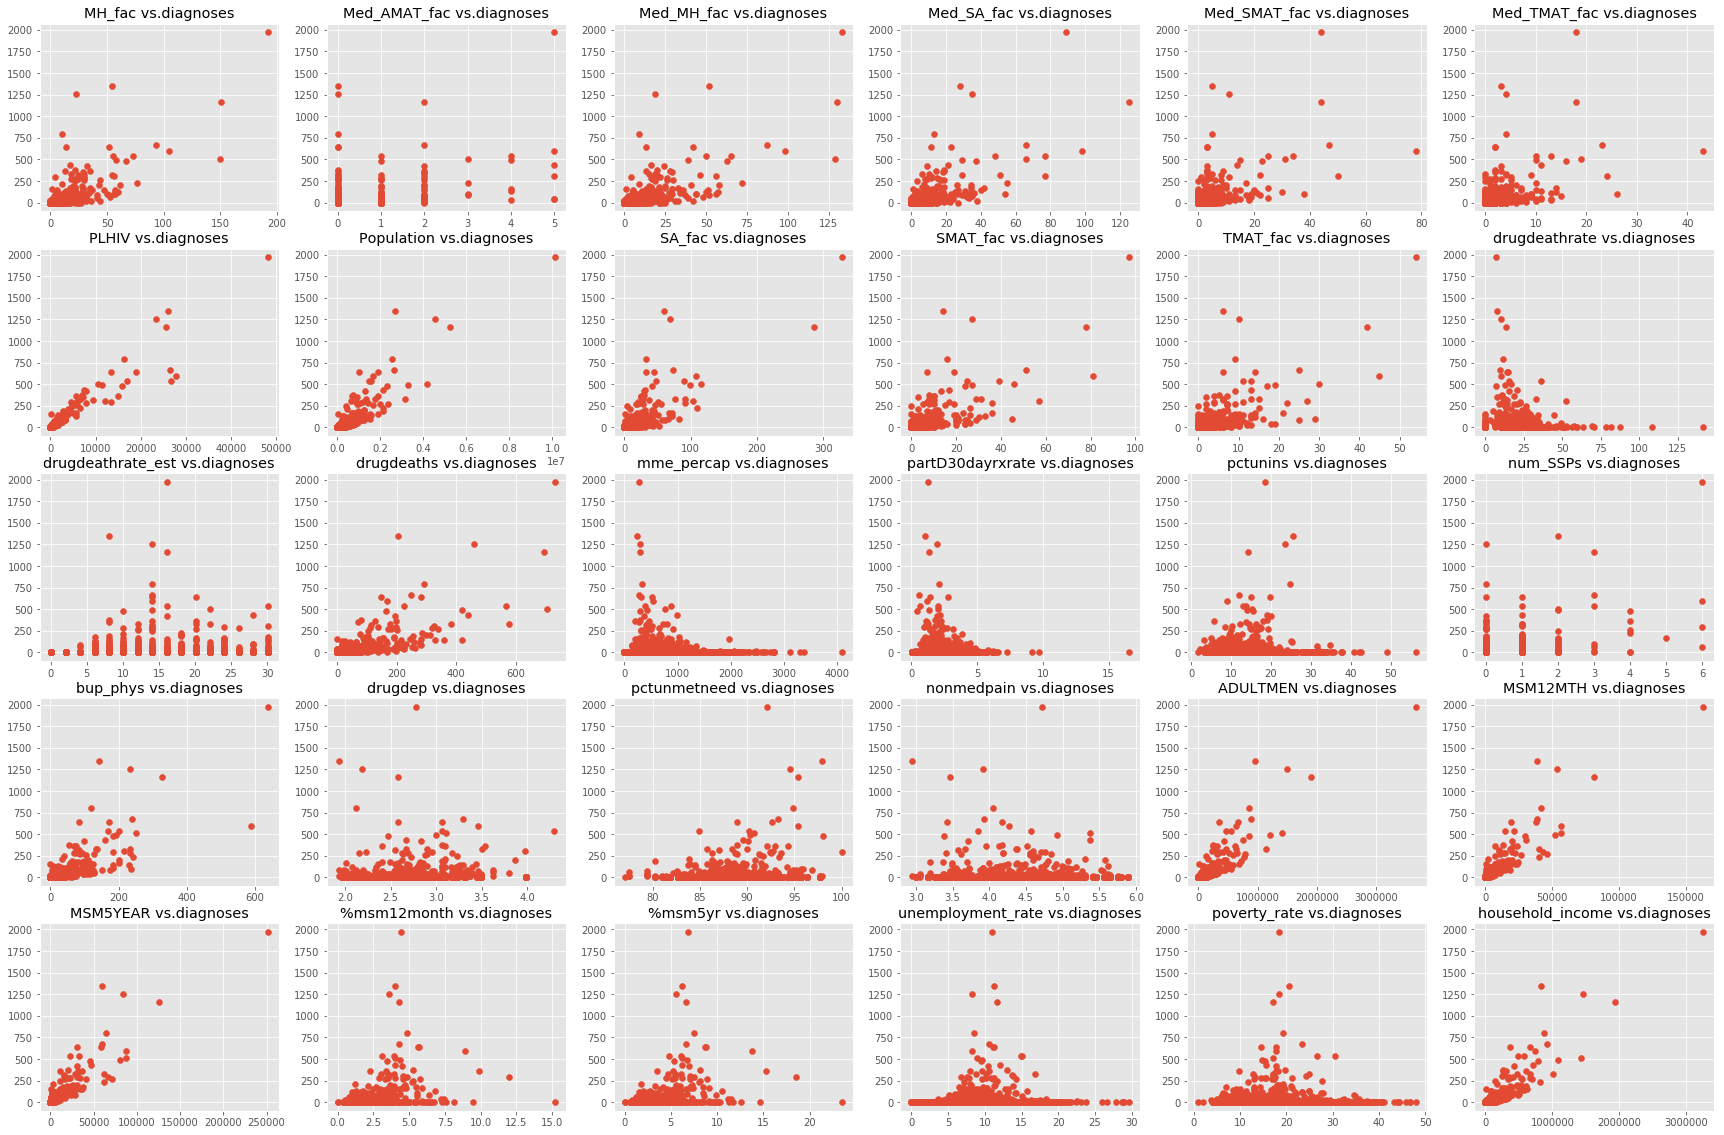

In [28]:
univariate_plots(x, y_0, data.columns[8:], 5, 6, 'diagnoses')

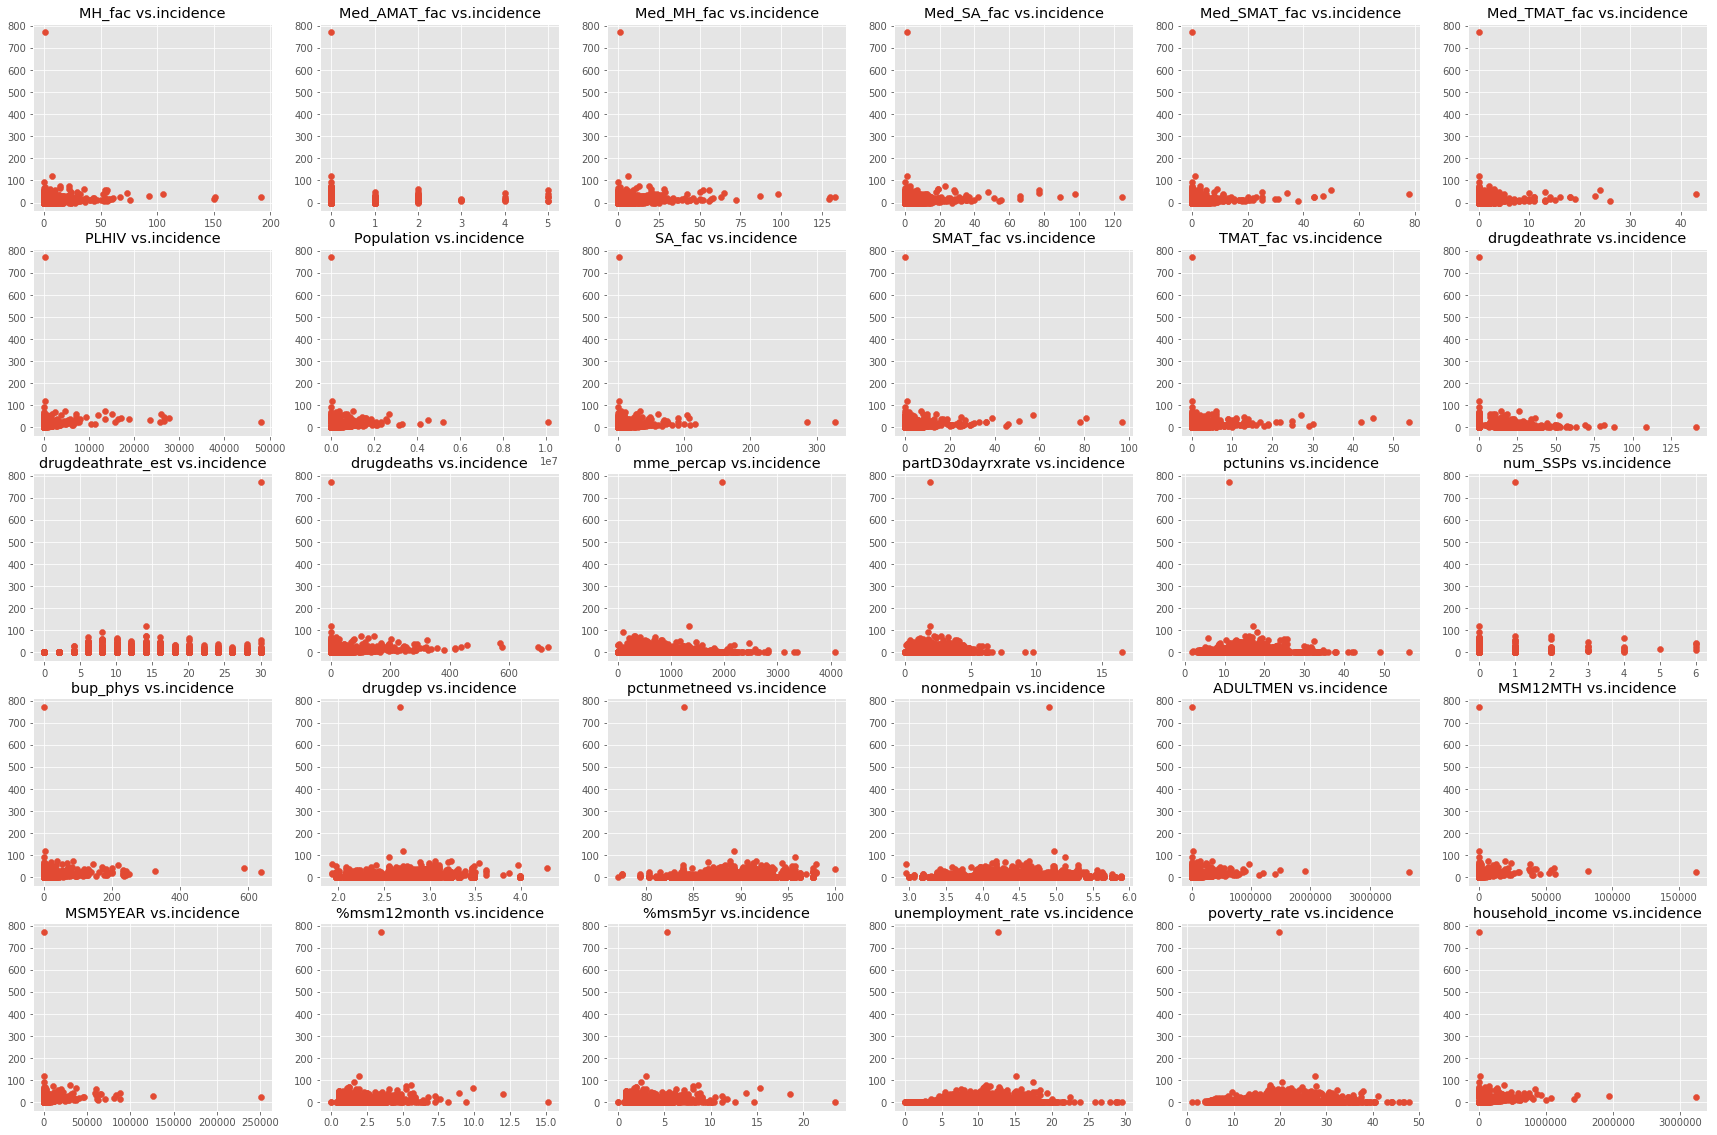

In [29]:
univariate_plots(x, y_1, data.columns[8:], 5, 6, 'incidence')

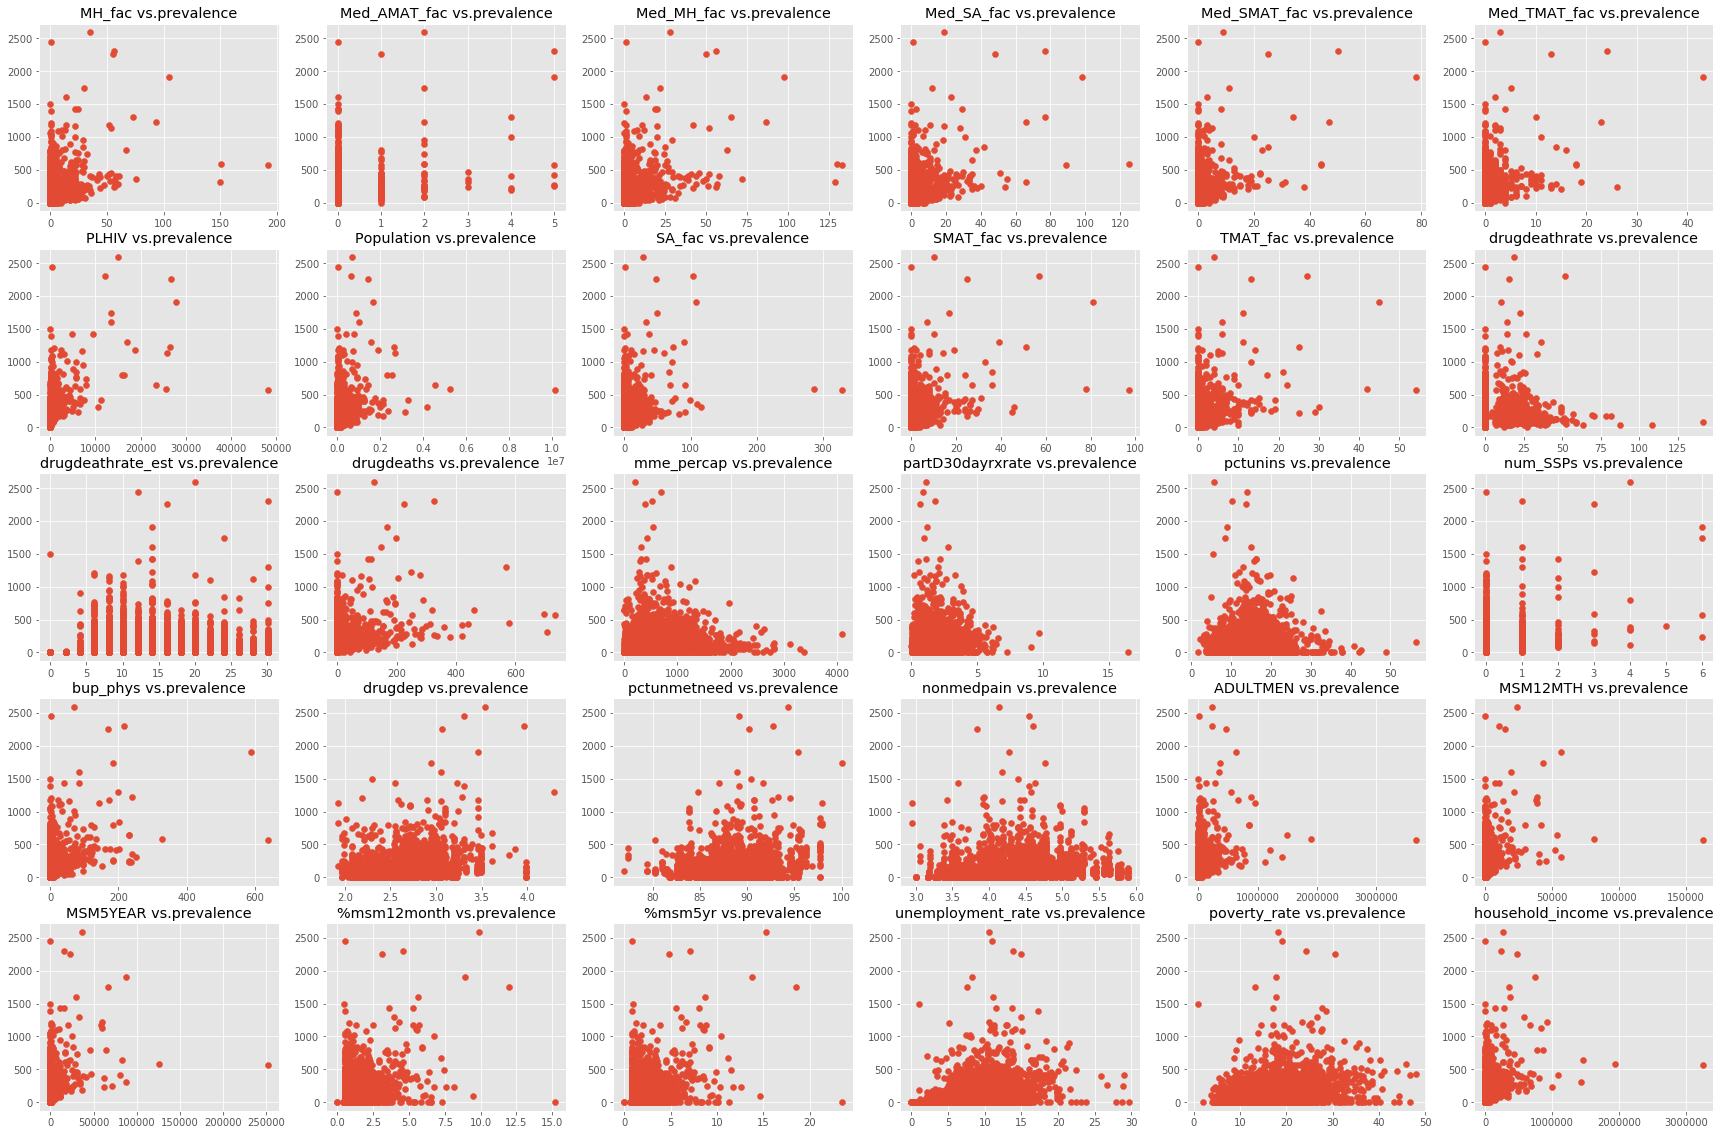

In [30]:
univariate_plots(x, y_2, data.columns[8:], 5, 6, 'prevalence')

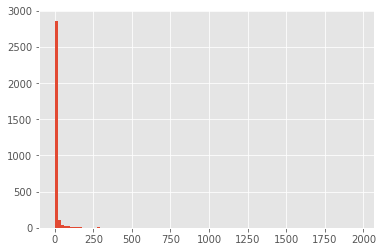

In [48]:
plt.hist(y_0, bins=100)
plt.show()

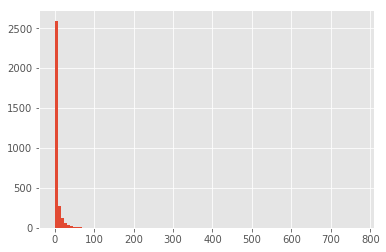

In [49]:
plt.hist(y_1, bins=100)
plt.show()

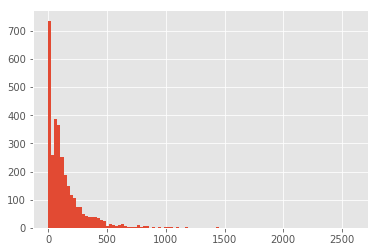

In [50]:
plt.hist(y_2, bins=100)
plt.show()

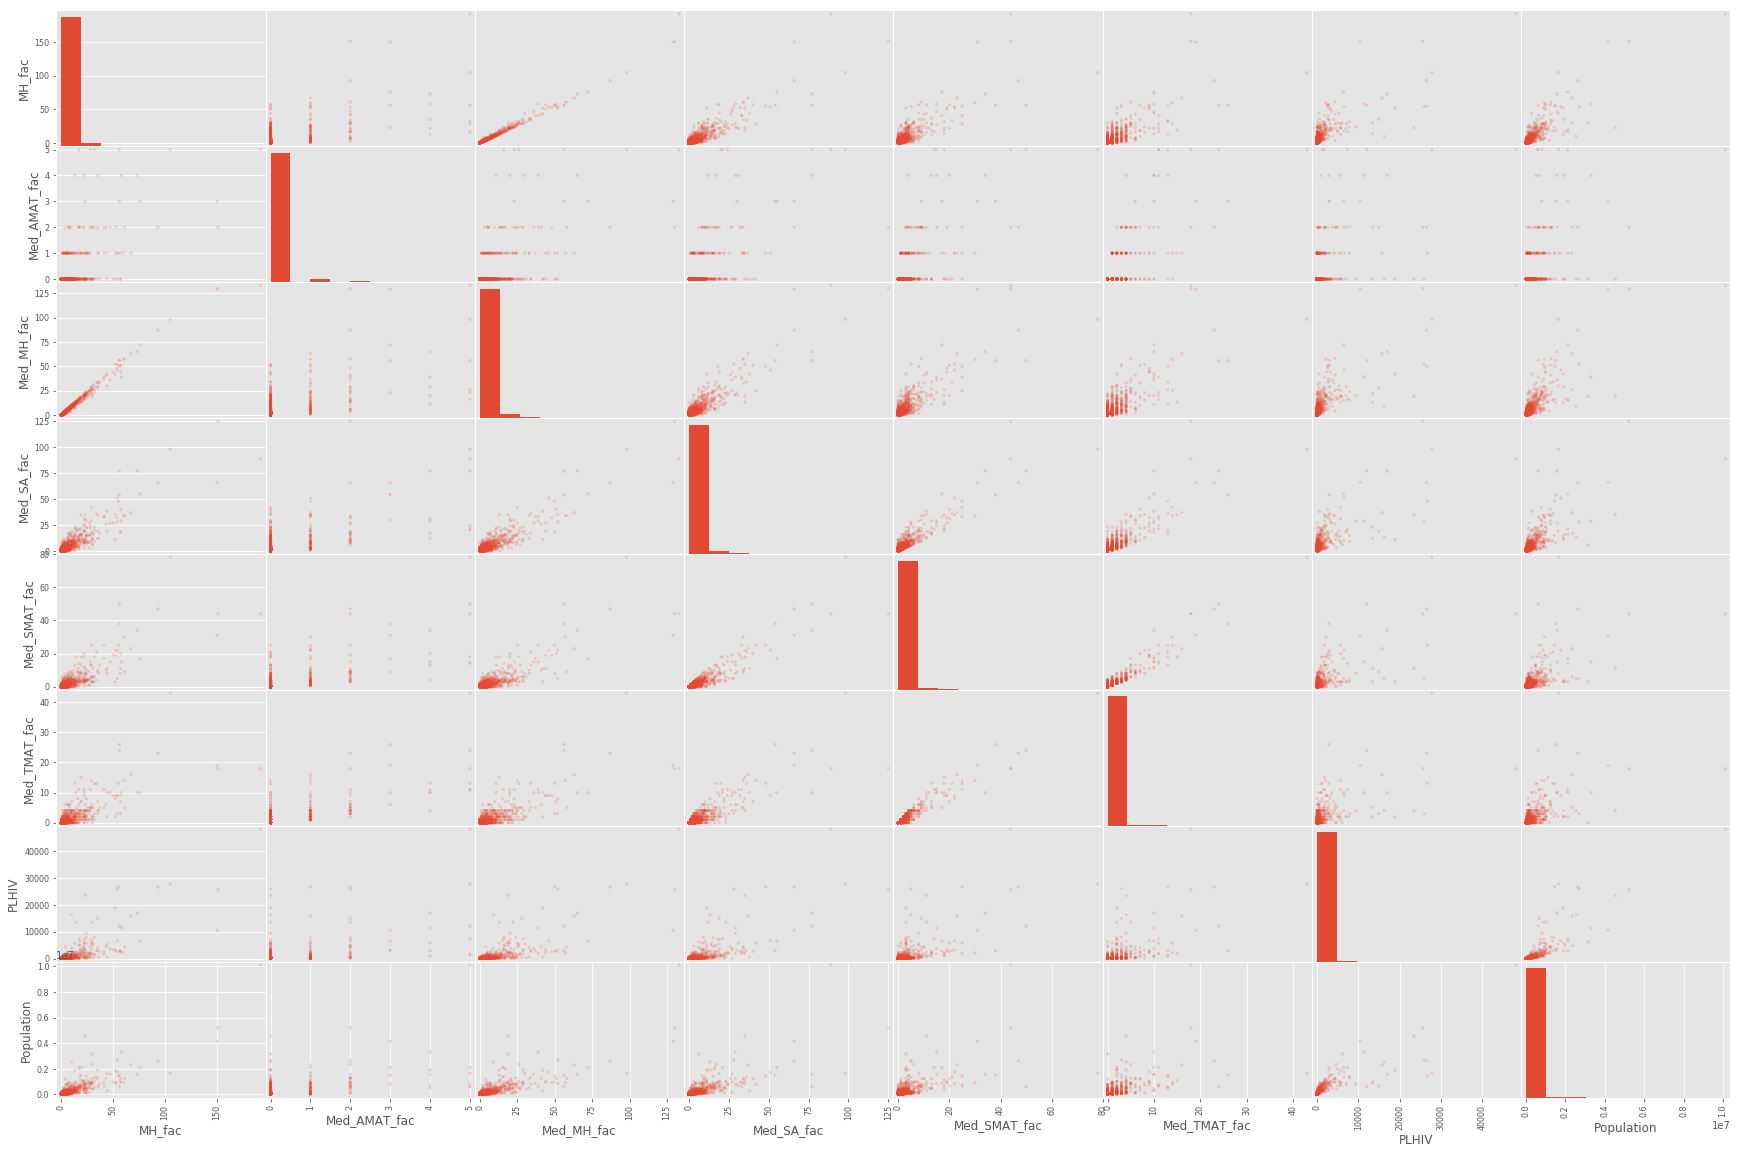

In [60]:
pd.plotting.scatter_matrix(data.iloc[:, 8:16], alpha=0.2, figsize = (30, 20))
plt.show()

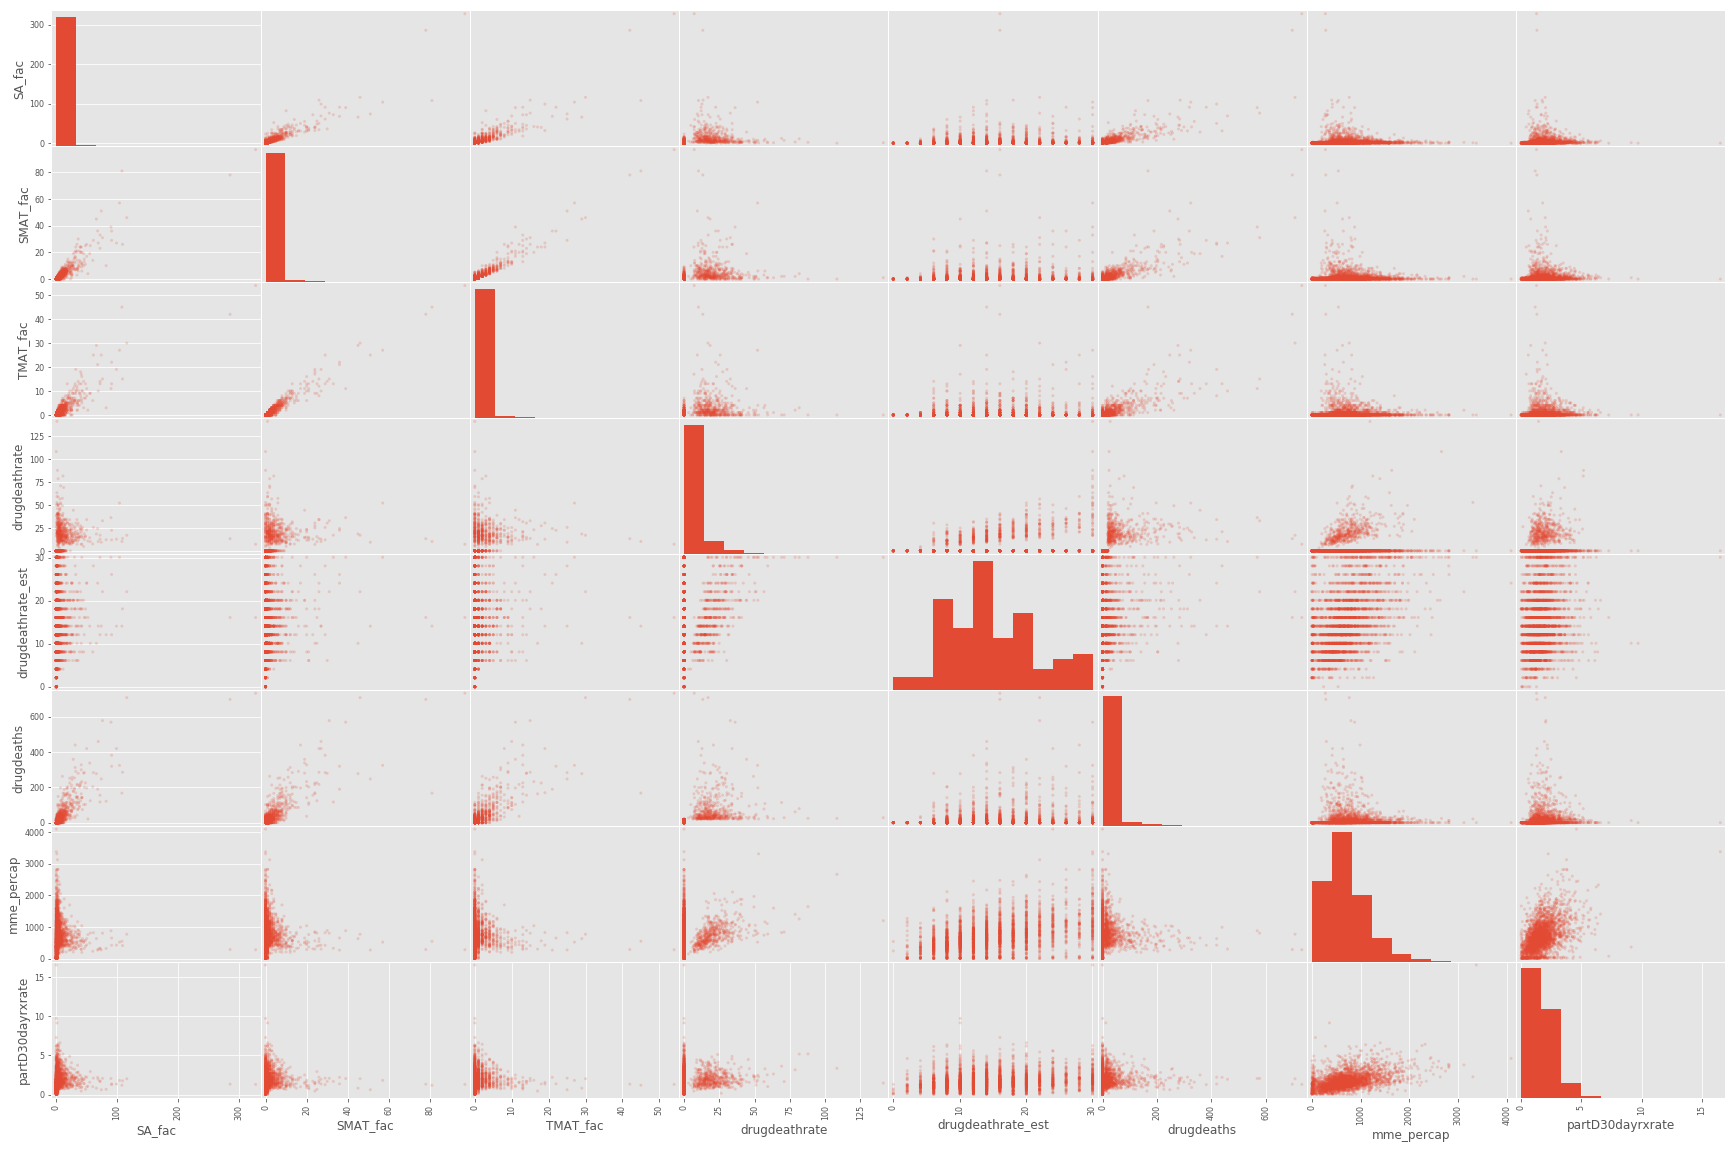

In [68]:
pd.plotting.scatter_matrix(data.iloc[:, 16:24], alpha=0.2, figsize = (30, 20))
plt.show()

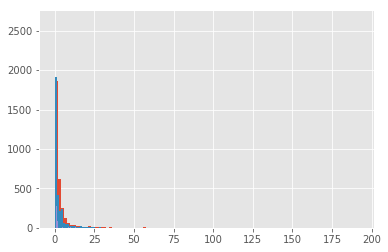

In [67]:
plt.hist(data['MH_fac'],  bins = 100)
plt.hist(data['Med_MH_fac'], bins = 100)
plt.hist(data['Med_TMAT_fac'], bins = 100)
plt.show()

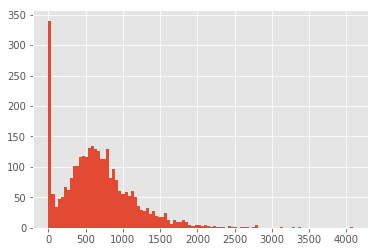

In [77]:
plt.hist(data['mme_percap'].fillna(0),  bins = 100)
# plt.hist(data['Med_MH_fac'], bins = 100)
# plt.hist(data['SMAT_fac'], bins = 100)
plt.show()

In [72]:
data['mme_percap'].fillna(0)

0       1084.0
1       1148.5
2        577.6
3        563.0
4        459.0
         ...  
3135    1044.8
3136     387.8
3137    1067.8
3138    1444.0
3139     566.9
Name: mme_percap, Length: 3140, dtype: float64